# Time series data analysis

In [ ]:
"""
What is time series data?
Collection of data observations obtained through repeated measurement over time used for trend analysis is time series data. 
One of the axes will always be time in the graph plot. 

What is its use?
As world is rapidly changing, sensors and systems are constantly emitting a relentless stream of time series data.
Such data can be used to predict and implement multiple concept in the metal industry. Time series analysis can be used to 
predict or observe how given asset, temperature, pressure, amplitude can change over the given period and hence help us to 
make decisions in the coming time.
"""


In [2]:
#Importing Libraries
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10,7), 'figure.dpi' : 120})


In [3]:
#Reading the File
df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/a10.csv', parse_dates=['date'])

In [4]:
#Displaying top 5 rows
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [5]:
#Visualizing a time series
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Valuse', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x,y, color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

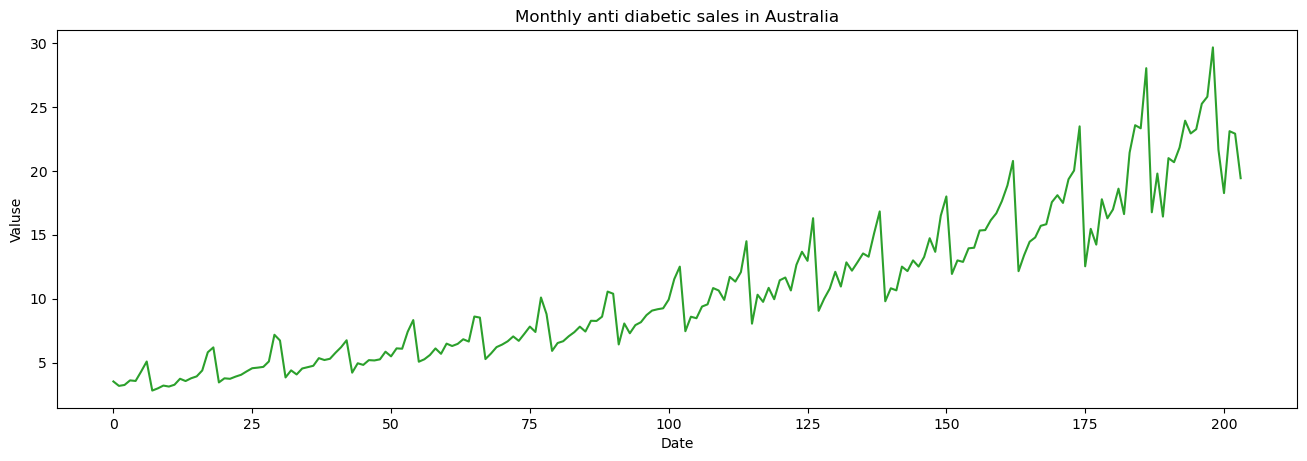

In [6]:
plot_df(df, x=df.index, y=df.value, title='Monthly anti diabetic sales in Australia')

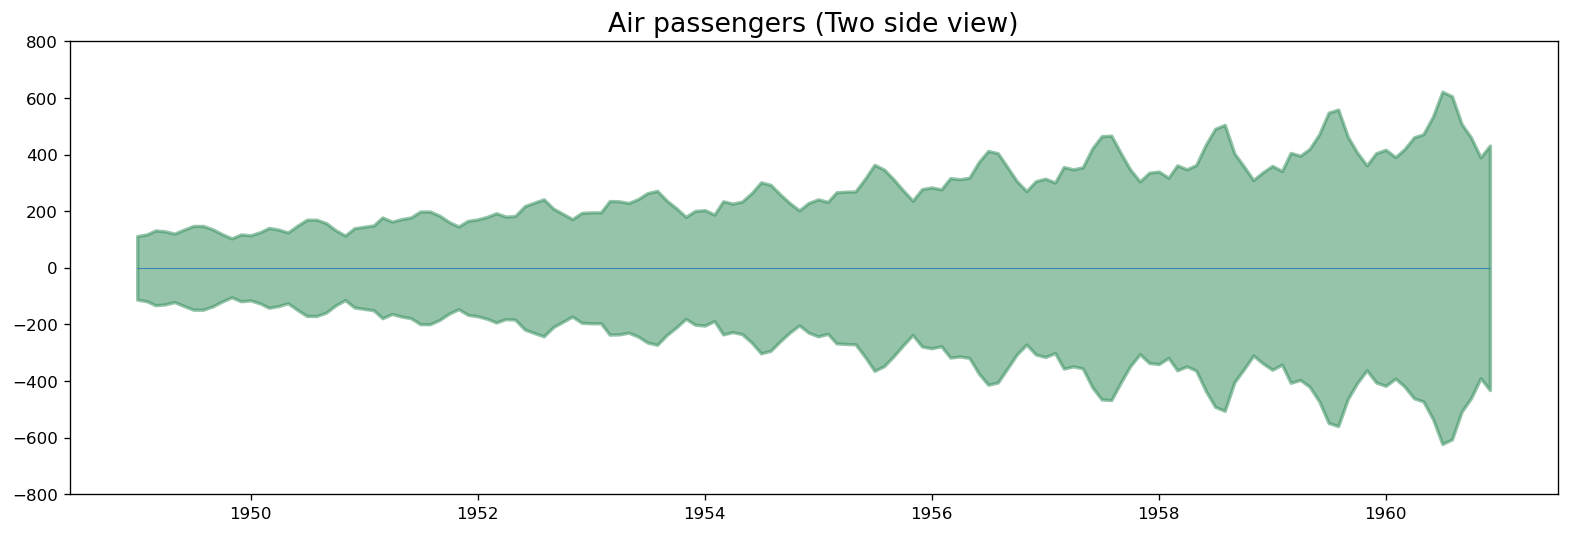

In [7]:
# Importing the data
df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/AirPassengers.csv', parse_dates=['date'])
x = df['date'].values
y1 = df['value'].values

#Plotting the graph
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi =120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800,800)
plt.title('Air passengers (Two side view)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=0.5)
plt.show()



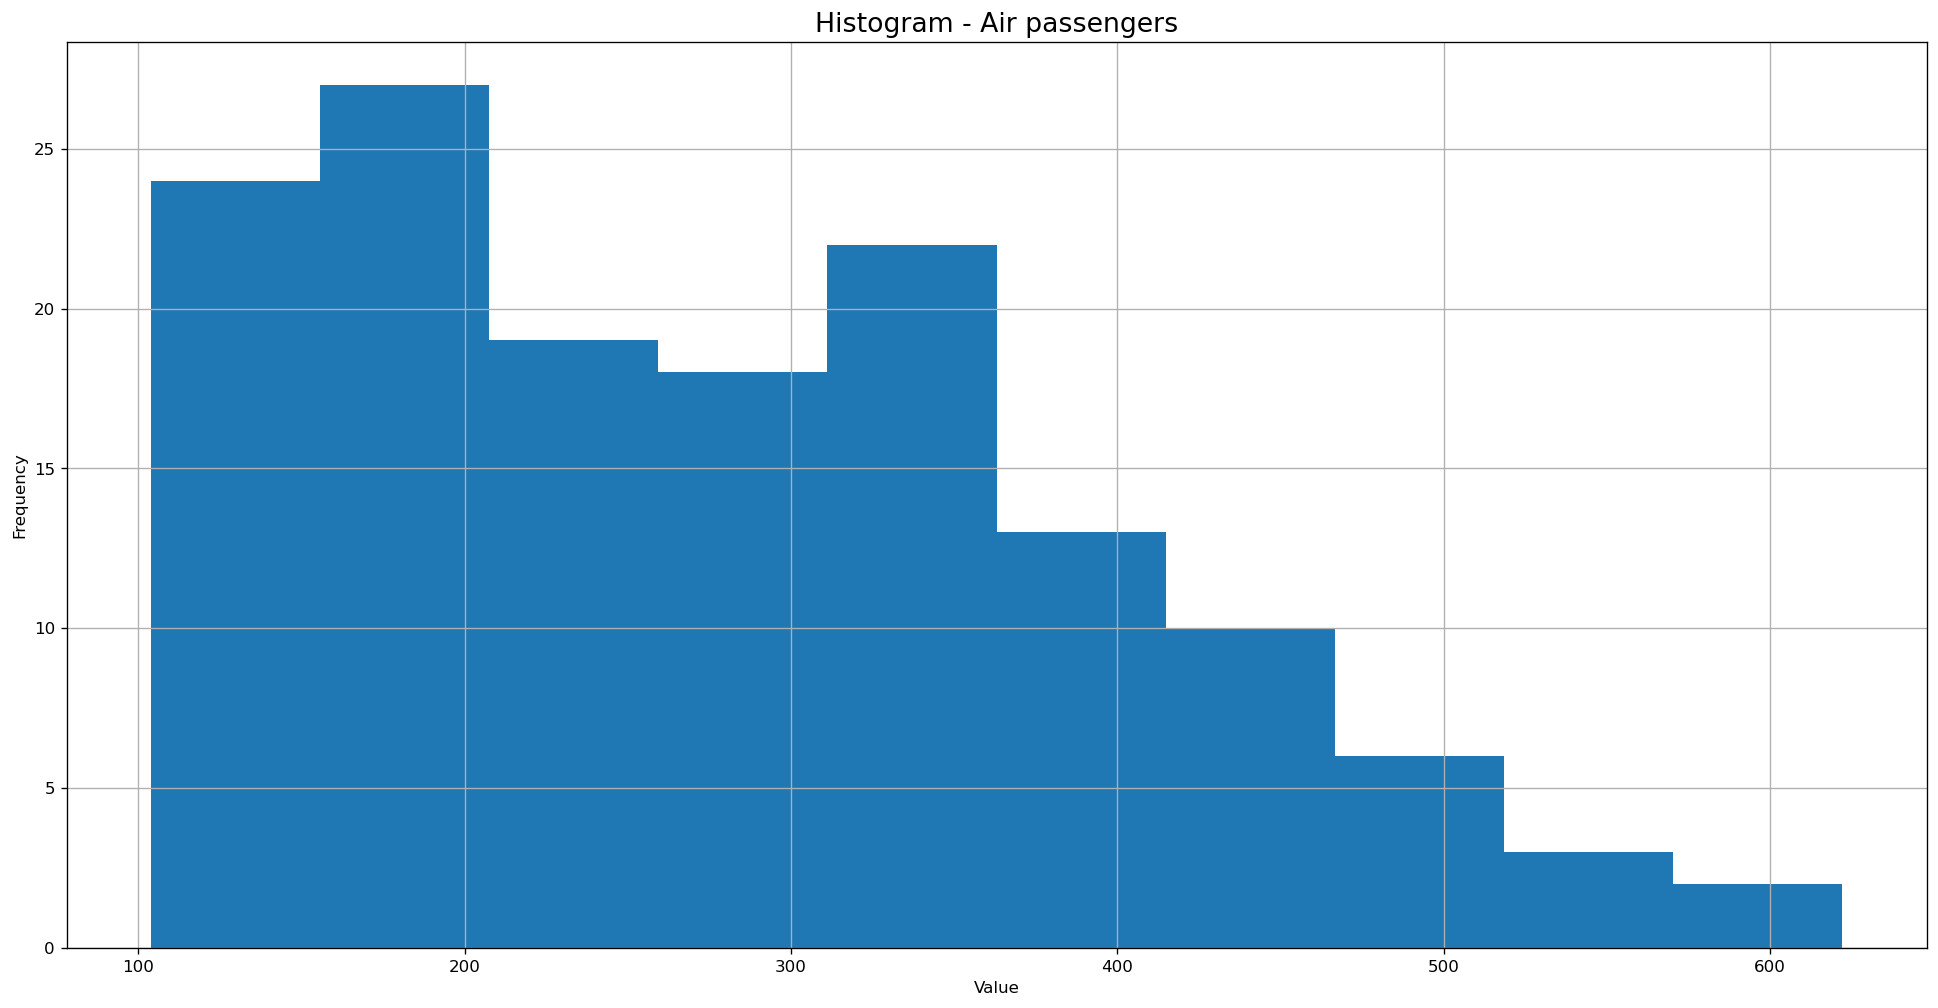

In [8]:
# Visualizing using Histogram (Matplotlib Package)
#Importing the data
df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/AirPassengers.csv', parse_dates=['date'], index_col='date')

#Plotting the graph using matplotlib
df.hist(figsize=(20,10))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram - Air passengers', fontsize=16)
plt.show()


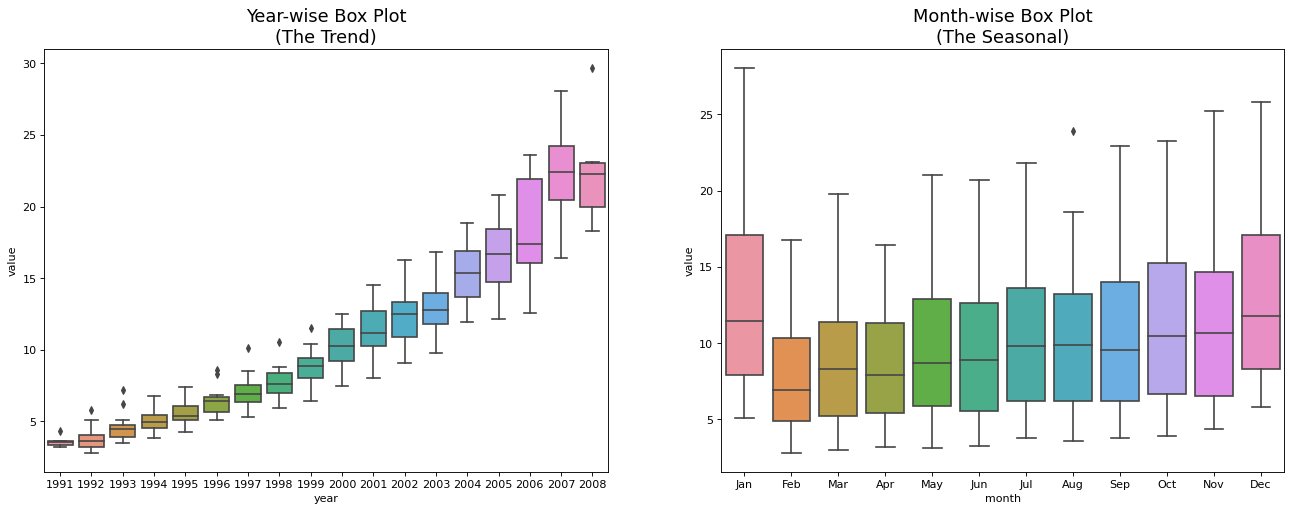

In [114]:
#Boxplot of Month-wise and Year-wise distribution
#Importing the data
df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

#Preparing the data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

#Drawing the plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi = 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991,2008]), :])

#setting the title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=16)
axes[1].set_title('Month-wise Box Plot\n(The Seasonal)', fontsize=16)
plt.show()


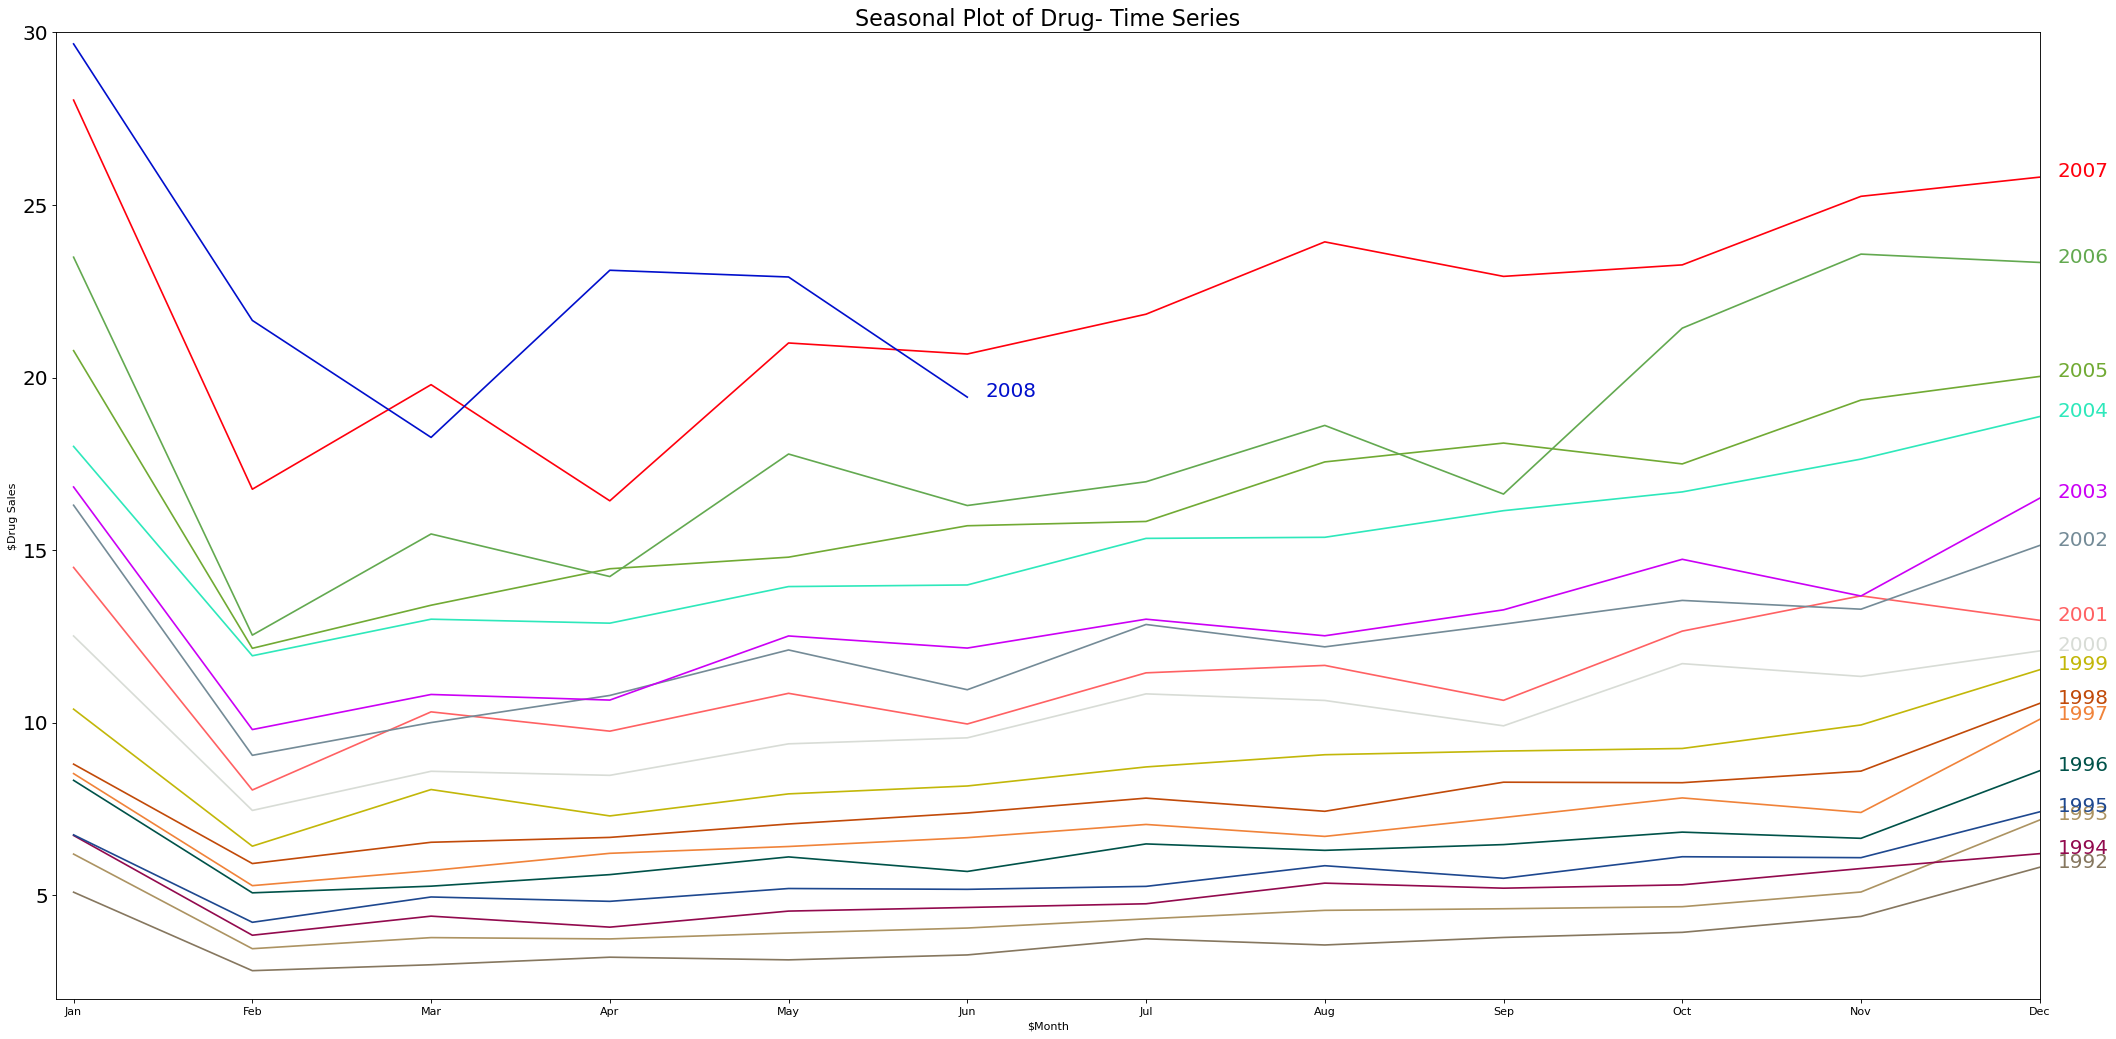

In [109]:
#Seasonal plot of a time series data
#Importing the data
df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

#Preparing the data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

#Preparing the colors
np.random.seed(1000)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

#Drawing the plot
plt.figure(figsize=(32,16), dpi=80)
for i, y in enumerate(years):
    if i>0:
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=18, color=mycolors[i])
        

#Decorating the graph
plt.gca().set(xlim=(-0.1,11), ylim=(2,30), ylabel='$Drug Sales', xlabel='$Month')
plt.yticks(fontsize=18, alpha=1)
plt.title("Seasonal Plot of Drug- Time Series", fontsize=20)
plt.show()


<AxesSubplot:title={'center':'Trend and Seasonality airpassengers'}, xlabel='date'>

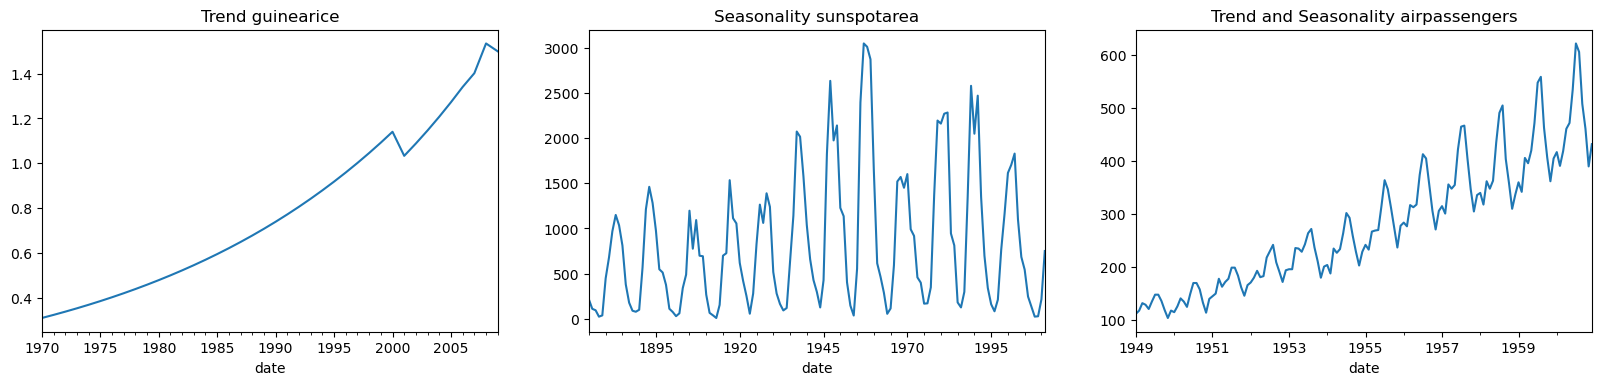

In [117]:
# Patterns in a time series data
#Any time series may be split into : Base level + Trend + Seasonality + Error
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend guinearice', legend=False, ax=axes[0])

pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality sunspotarea', legend=False, ax=axes[1])

pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality airpassengers', legend=False, ax=axes[2])

# Additive and Multiplicative time series 

Based on the nature of trend, seasonality and trend, a time series can be modelled as an additive and multiplicative,
each observation in the time series can be expressed as either a sum or product of the component

Additive Time Series
Value = Base Level + Trend + Seasonality + error

Multiplicative Time Series
Value = Base Level * Trend * Seasonality * Error

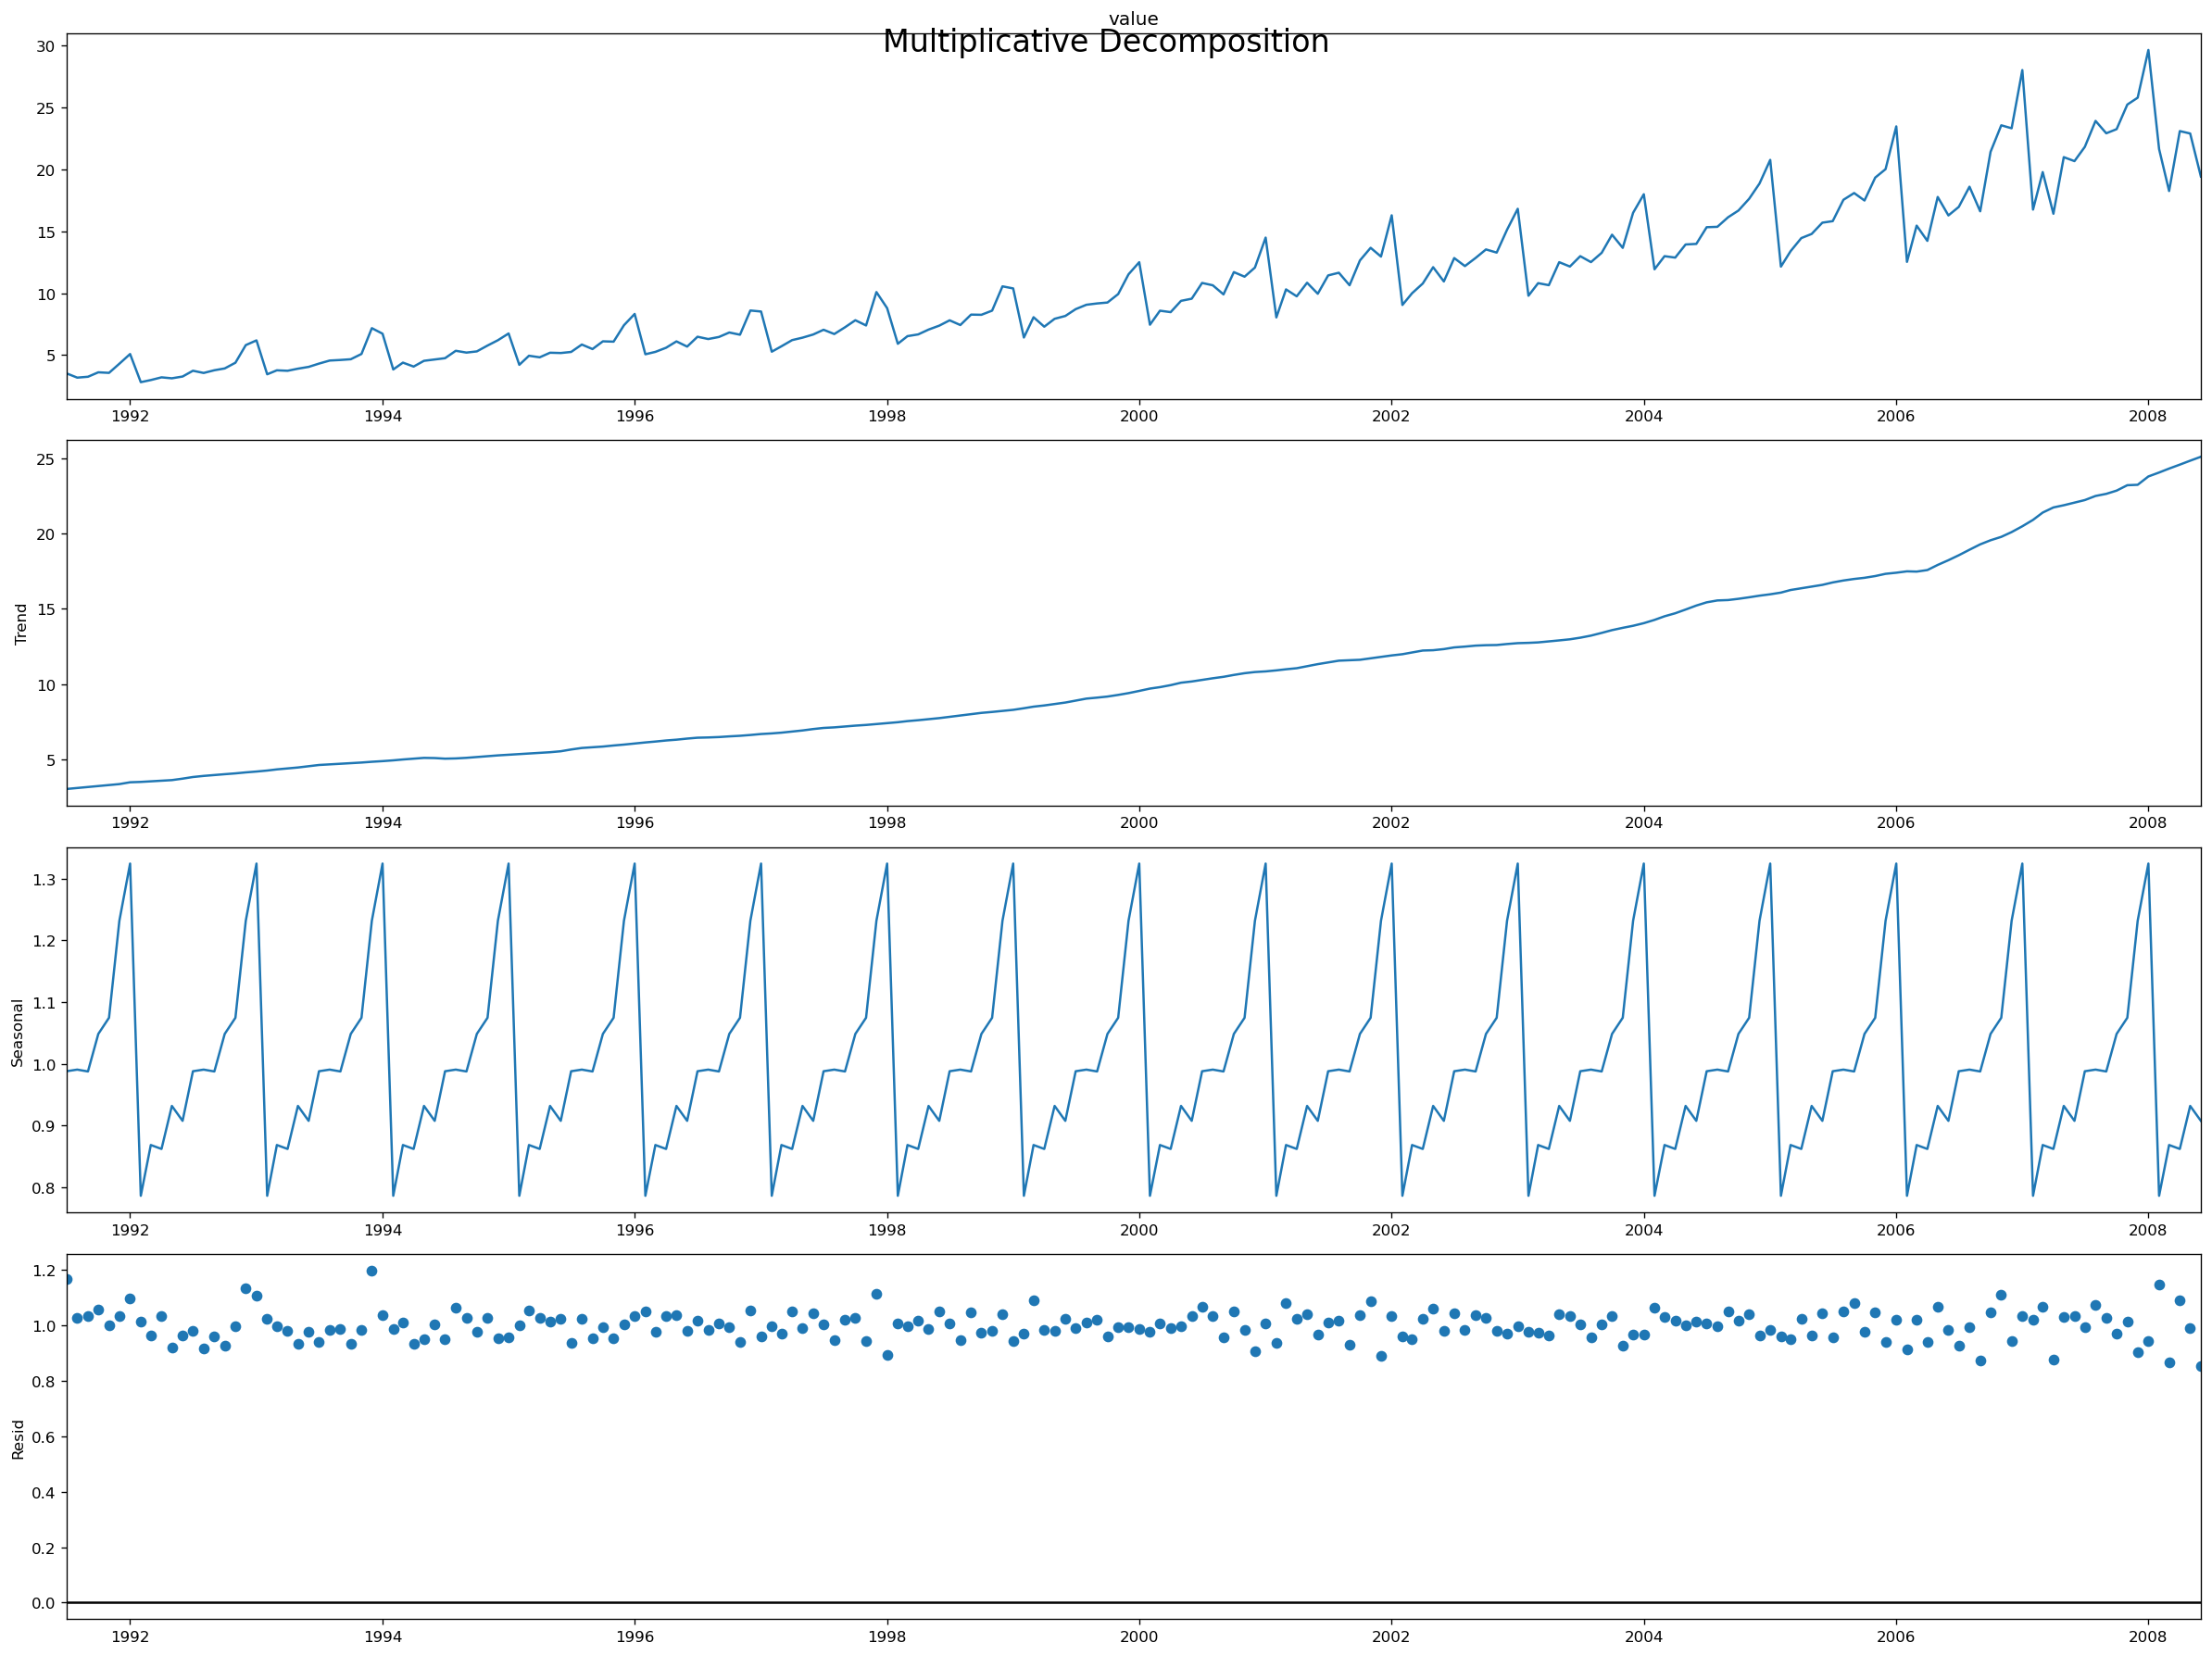

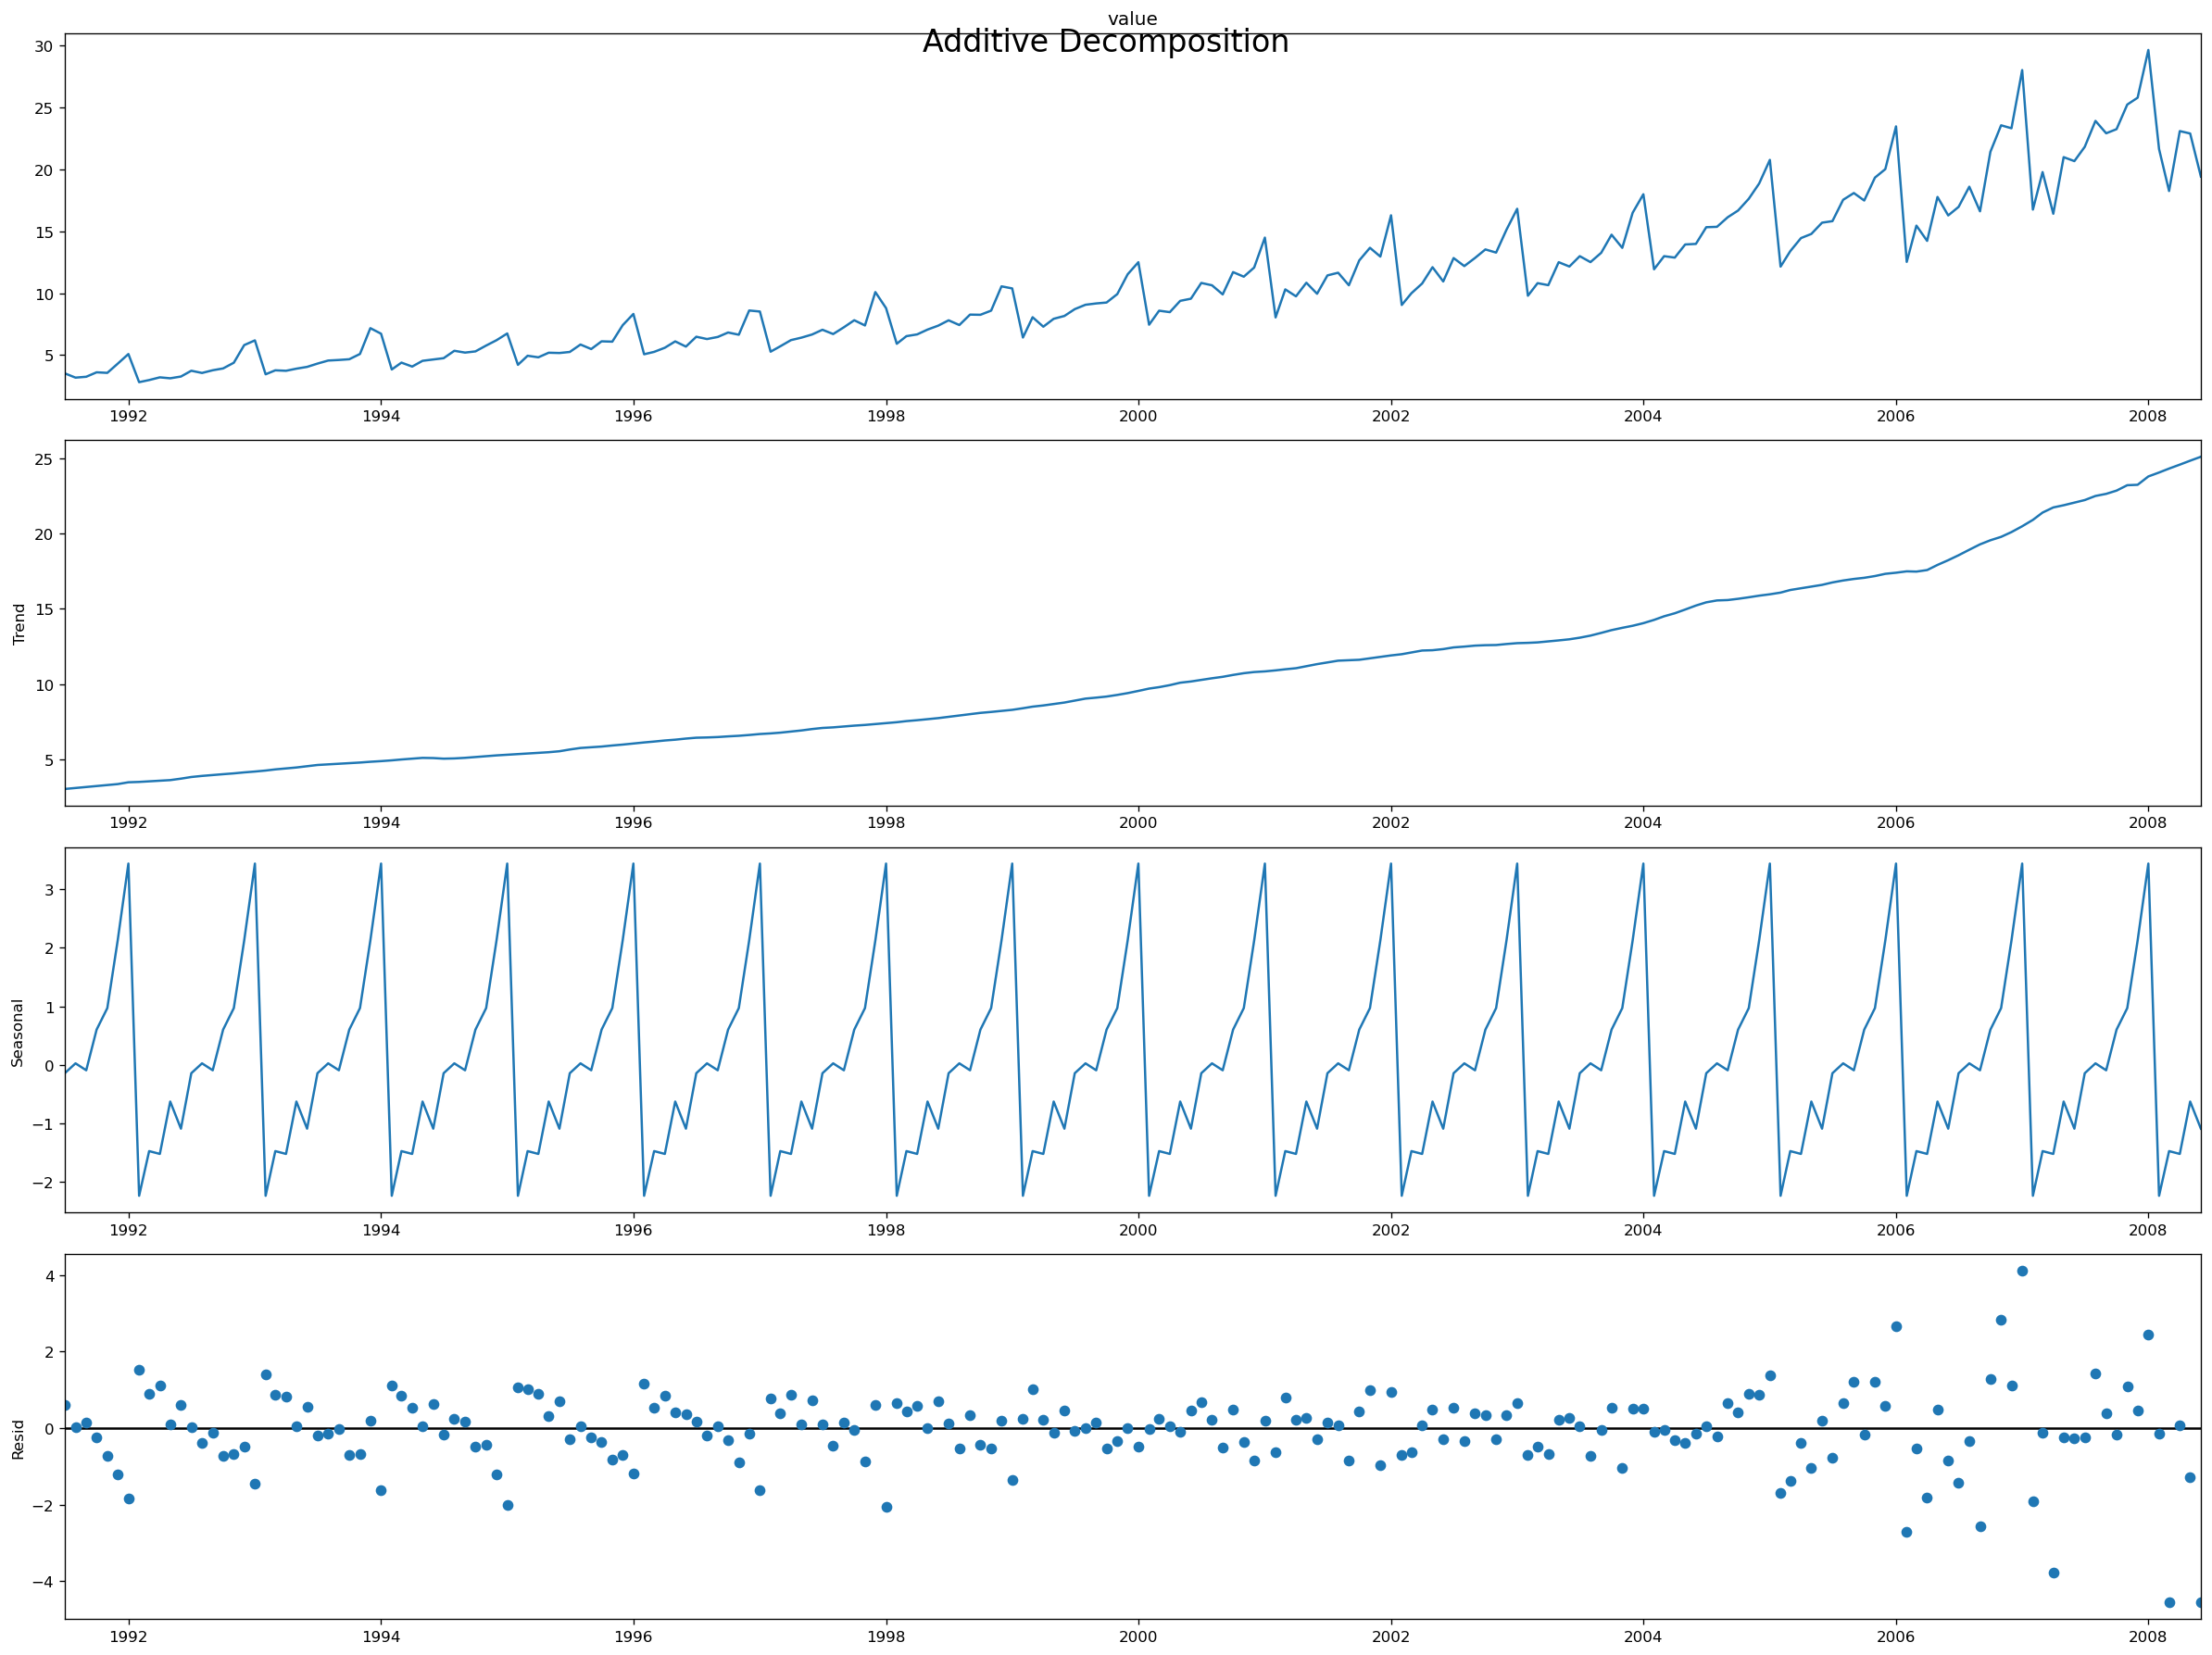

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Importing Data
df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition for time series data
mul_res = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition for time series data
add_res = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

#Plotting the graph
plt.rcParams.update({'figure.figsize': (20,15)})
mul_res.plot().suptitle('Multiplicative Decomposition', fontsize=20)
add_res.plot().suptitle('Additive Decomposition', fontsize=20)
plt.show()


In [ ]:
"""Setting extrapolate_trend='freq' takes care of any missing values in the trend and residuals at the beginning of 
the series."""

In [6]:
# Extracting the components
# Actual valuse = Product of(seasonal * trend * resid)
df_reconstructed = pd.concat([mul_res.seasonal, mul_res.trend, mul_res.resid, mul_res.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_value']
df_reconstructed.head()

,seas,trend,resid,actual_value
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


In [ ]:
"""
Stationary time series?
Stationarity is a property of a time series. It is one where the values of series is not a function of time. 
Statistical properties like mean, variance and auto relations are constant over time. Stationary time series is devoid of 
seasonal effects. Most statistical forecasting methods are designed to work on a stationary time series. The first step in the 
forecasting process is typically to do some transformation to convert a non-stationary series to stationary.

How to make time series stationary?
Time series can be made stationary by:
•	Differencing the series (once or more than once)
•	Taking nth root of the series
•	Taking log of series
•	Combination of all the above

What is differencing?
If Y_t is the value at time ‘t’, then the first difference of Y = Yt – Yt-1. In simpler terms, differencing the series
is nothing but subtracting the next value by the current value. If the first difference doesn’t make a series stationary, 
you can go for the second differencing. And so on. For example, consider the following series: [1, 5, 2, 12, 20]
First differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]
Second differencing gives: [-3-4, -10-3, 8-10] = [-7, -13, -2]

Why make a non-stationary series stationary before forecasting?
Forecasting a stationary series is relatively easy and the forecasts are more reliable.
An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) 
of the series itself as predictors.
We know that linear regression works best if the predictors (X variables) are not correlated against each other. Therefore, to
make the series stationary solves this problem since it removes any persistent autocorrelation, thereby making the predictors 
(lags of the series) in the forecasting models nearly independent.

How to test for stationarity?
We split the series into two or more contiguous parts and computing the summary statistics like the mean, variance and 
the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.
Nevertheless, you need a method to quantitatively determine if a given series is stationary or not. This can be done using
statistical tests called ‘Unit Root Tests’. There are multiple variations of this, where the tests check if a time series is 
non-stationary and possess a unit root.
In statistics, a unit root test tests whether a time series variable is non-stationary and possesses a unit root. The null 
hypothesis is defined as the presence of a unit root and the alternative hypothesis is either stationarity, trend stationarity 
or explosive root depending on the test used.
Unit Root tests can be implemented by following methods:
1.	Augmented Dickey Fuller test (ADF Test)
2.	Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
3.	Philips Perron test (PP Test)
The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is 
non-stationary. So, if the P-Value in ADF test is less than the significance level (0.05), you reject the null hypothesis. 
ADF is based on linear regression. Serial correlation can be an issue, in which case the Augmented Dickey-Fuller (ADF) test can
be used. The ADF handles bigger, more complex models. It does have the downside of a fairly high Type I error rate.
The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation
is just the opposite of ADF test.
The Phillips–Perron (PP) Test is a modification of the Dickey Fuller test, and corrects for autocorrelation and 
heteroscedasticity in the errors.
"""


In [62]:
# How to test Stationarity?
from statsmodels.tsa.stattools import adfuller, kpss
from dateutil.parser import parse

# Importing Data
df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/a10.csv', parse_dates=['date'])

#ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Stats: {result[0]}')
print(f'P-Value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'{key}, {value}')
    
# KPSS Test
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'{key}, {value}')


ADF Stats: 3.14518568930673
P-Value: 1.0
Critial Values:
1%, -3.465620397124192
Critial Values:
5%, -2.8770397560752436
Critial Values:
10%, -2.5750324547306476

KPSS Statistic: 1.313675
p-value: 0.010000
Critial Values:
10%, 0.347
Critial Values:
5%, 0.463
Critial Values:
2.5%, 0.574
Critial Values:
1%, 0.739


C:\Users\yare01\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\yare01\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


<AxesSubplot:title={'center':'Random White Noise'}>

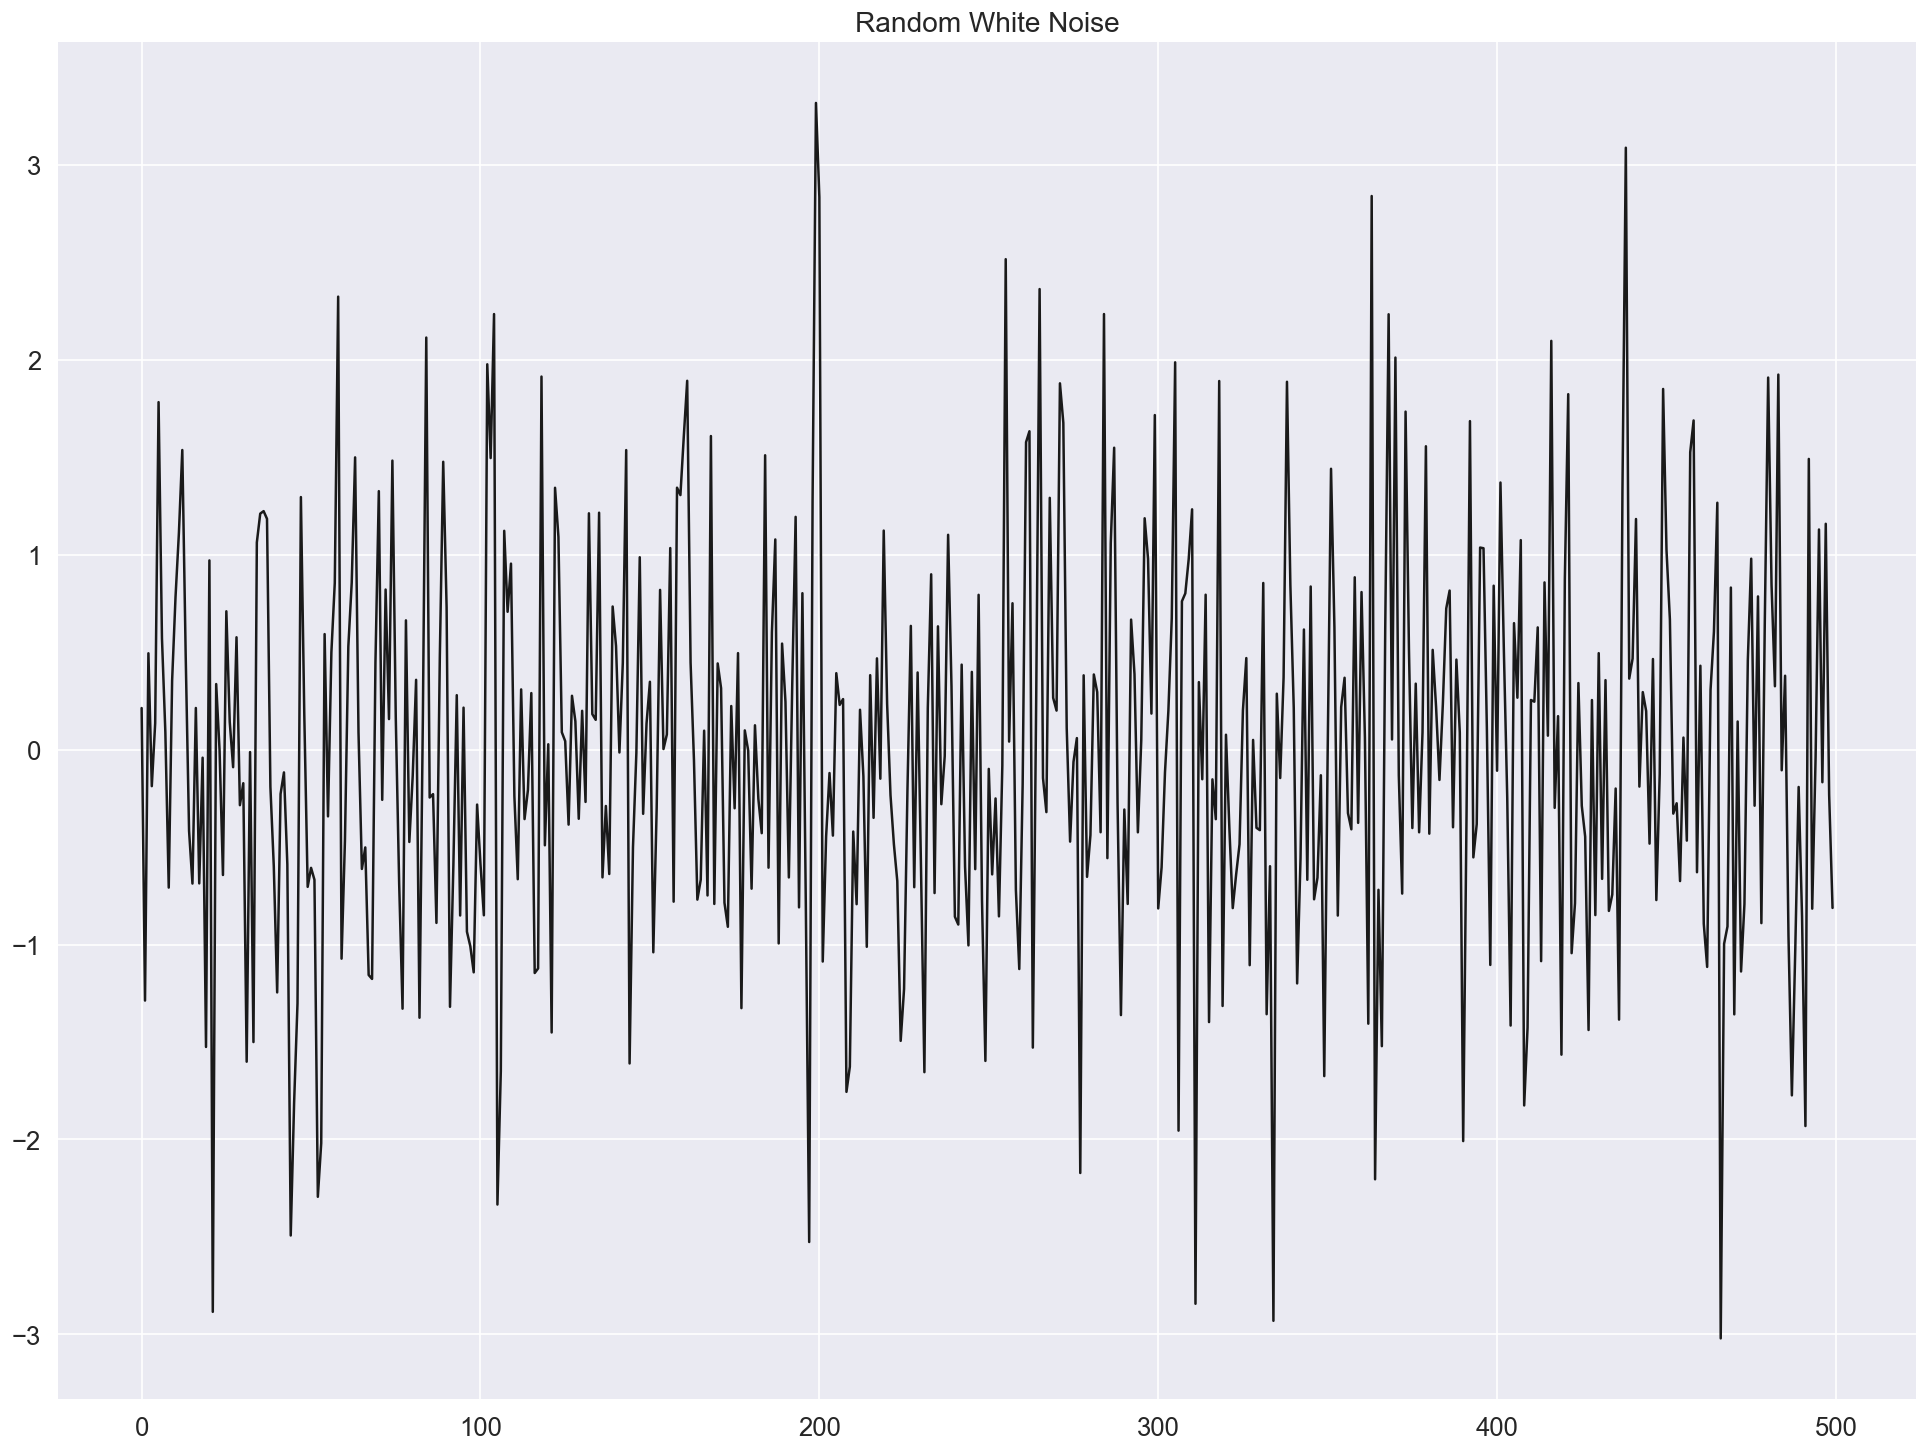

In [193]:
# Difference between white nosie and stationary series
"""Stationay series and white noise is not a function of time, i.e. its mean and variance do not chnage with time. But white
noise is completely random variable with mean of zero"""
#Below code depicts completely random numbers with zero mean i.e. white noise

rand_vals = np.random.randn(500)
pd.Series(rand_vals).plot(title='Random White Noise', color='k')

Text(0.5, 1.0, 'Durg sales - Detrend a timeseries by subtracting least square fit')

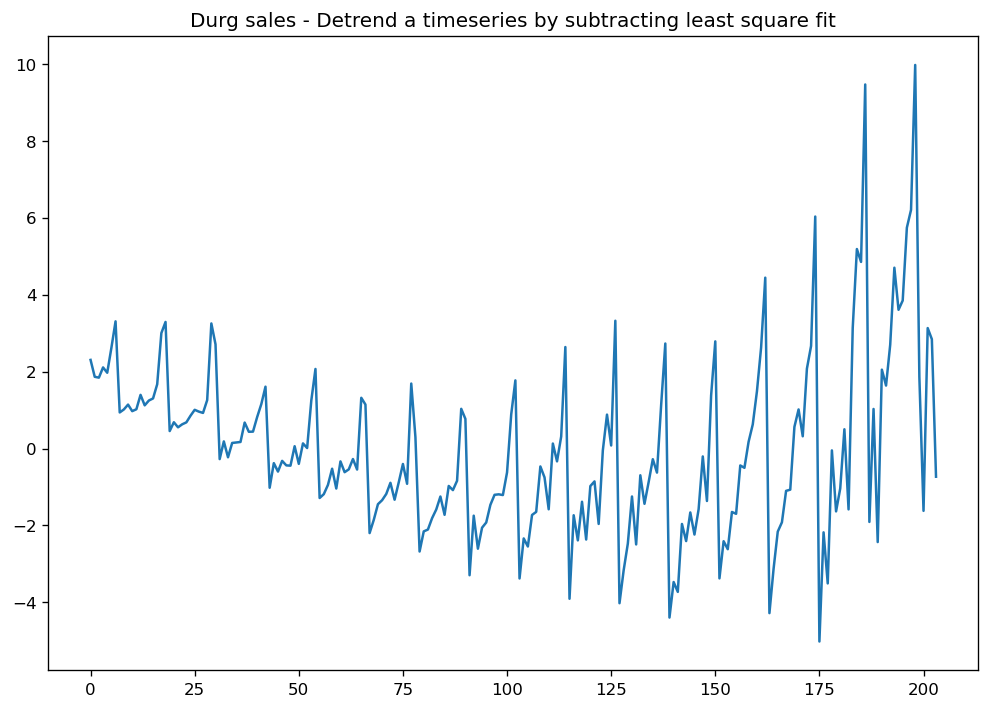

In [15]:
# To detrend a time series signal - means to remove the trend component rom at time series 
# Importing the data
# Using scipy: subtract the line of best fit
from scipy import signal
df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/a10.csv', parse_dates=['date'], index_col='date')
detrended = signal.detrend(df.value.values)
plt.plot(detrended)
plt.title('Durg sales - Detrend a timeseries by subtracting least square fit')


Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

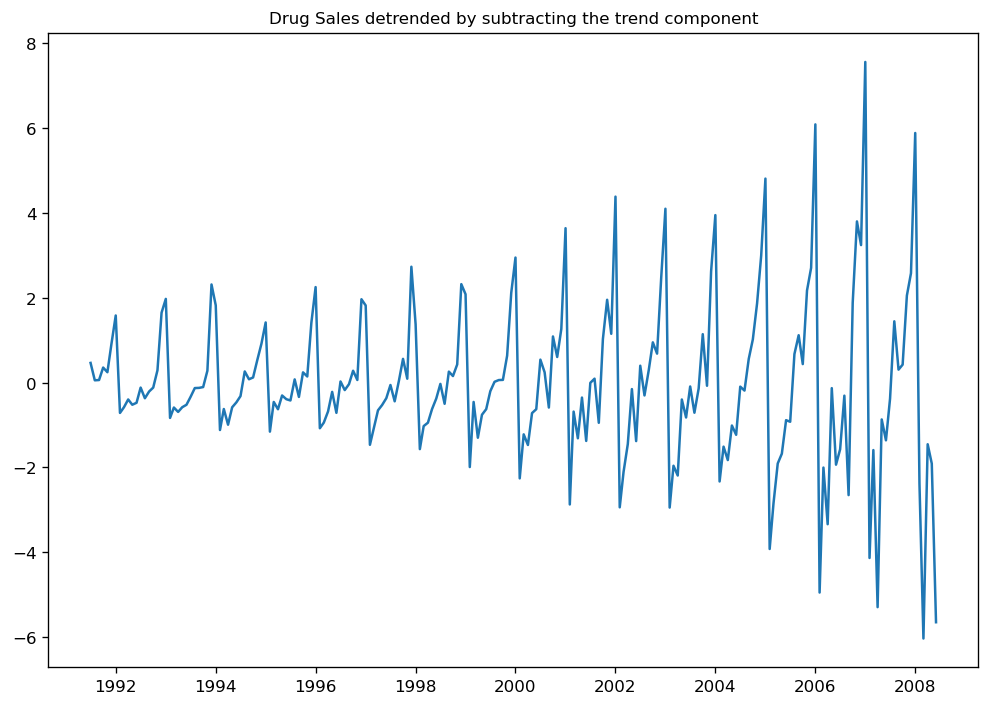

In [14]:
# Detrending - Using statmodels : subtracting the trend component
from statsmodels.tsa.seasonal import seasonal_decompose
#Importing the data
df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/a10.csv', parse_dates=['date'], index_col='date')
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=10)

[]

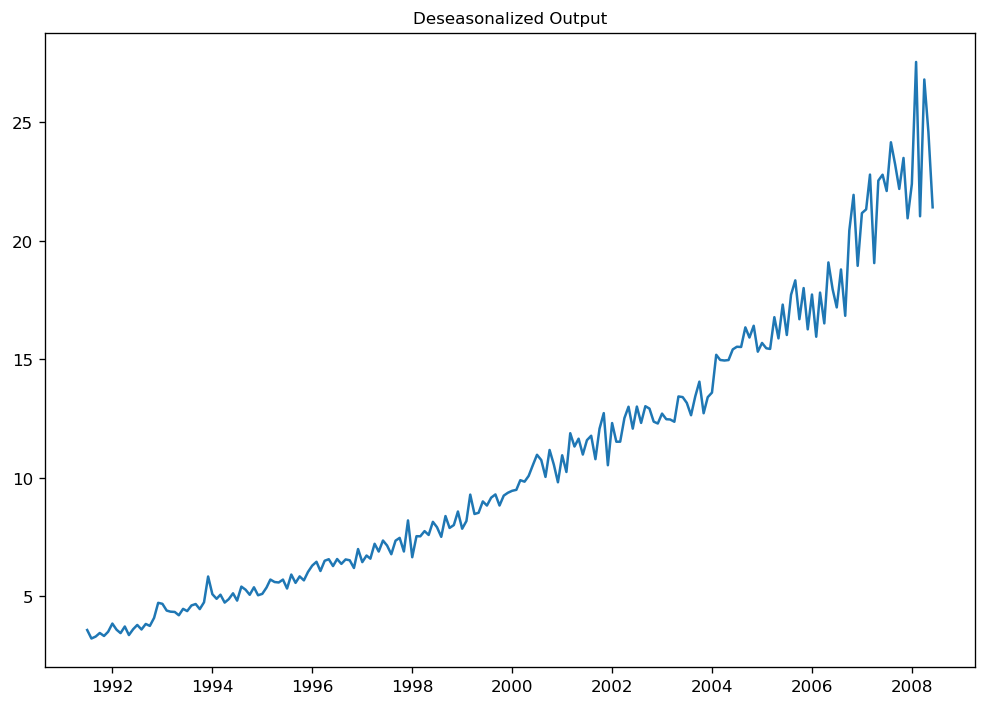

In [16]:
# To deseasonalize a time series
"""
Time series can be deseasonalized by:
1. Take moving average with length as a seasonal window
2. Seasonal difference the series
3. Divide the series by seasonal index obtained from STL decomposition
If dividing by seasonal index do not work properly, we can try taking log of the series and then do deseasonalizing. The
original scale can be obtained by taking exponential.
"""

# Importing the data
df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/a10.csv', parse_dates=['date'], index_col='date')

# Time Series decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseason = df.value.values/result_mul.seasonal

# Plotting
plt.plot(deseason)
plt.title('Deseasonalized Output', fontsize=10)
plt.plot()

In [17]:
 """
 How to treat the missing values in time series dataset?
 Sometimes, the data might be missing data like dates/times. This indicates that data was not captured or was not 
 available for those periods. There is possibilty that data must be zero during that time, so we can fill up those duration/ 
 periods with zeroes. One important thing in time series is that missing values should not be replaced by mean of the series,
 especially if the series is not stationary. We can instead do quick and dirty workaround .i.e forward fill the previous value.
 Some effective alternatives to imputation are:
 1. Backward Fill
 2. Linear Interpolation
 3. Quadratic Interpolation
 4. Mean or nearest neighbors
 5. Mean or seasonal counterparts
 
 To measure the imputation performance, we can manually introduce missing values to time series, impute it with the above 
 approaches and then measure the mean squared error of the imputed against the actual values.

 """
    
"""
We can also use the following approaches depending on how accurate my imputataion be:
1. If explanatory variables are present, then prediction model like random forest or knn can be used to predict it
2. If I have enough past observations, I can forecast the missing values
3. If I have enough future observations, I can backcast the missing values
4. Forecast of counterparts from previous cycles
"""

'\nHow to traet the missing values in time series dataset?\nSometimes, the data might be missing data like dates/times. This indicates that data was not captured or was not \navailable for those periods. There is possibilty that data must be zero during that time, so we can fill up those duration/ \nperiods with zeroes. One important thing in time series is that missing values should not be replaced by mean of the series,\nespecially if the series is not stationary. We can instead do quick and dirty workaround .i.e forward fill the previous value.\nSome effective alternatives to imputation are:\n1. Backward Fill\n2. Linear Interpolation\n3. Quadratic Interpolation\n4. Mean or nearest neighbors\n5. Mean or seasonal counterparts\n\nTo measure the imputation performance, we can manually introduce missing values to time series, impute it with the above \napproaches and then measure the mean squared error of the imputed against the actual values.\n\n'

C:\Users\yare01\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: Mean of empty slice
C:\Users\yare01\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

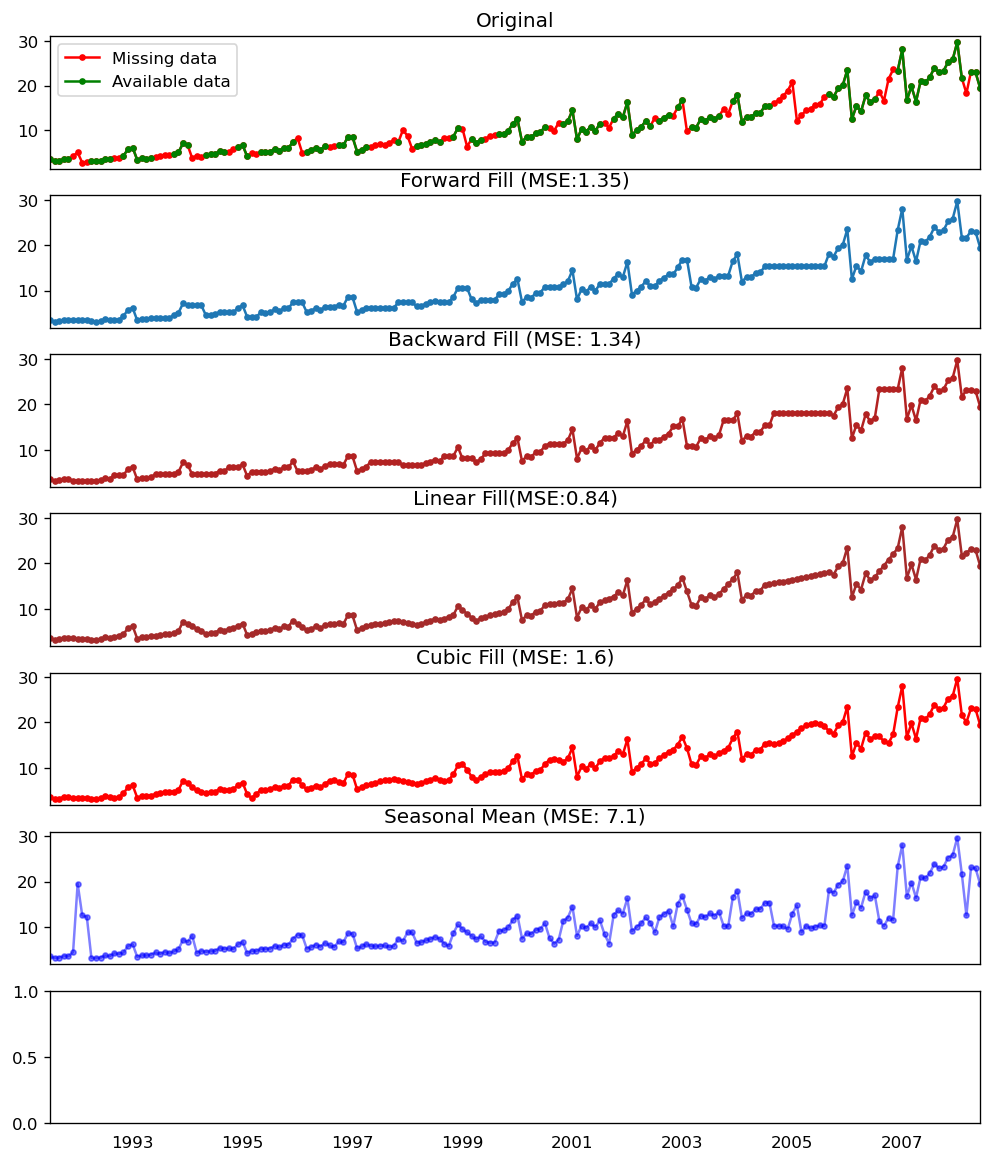

In [48]:
# Dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
df_org = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/a10.csv', parse_dates=['date'], index_col='date')
df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/a10MissingData.csv', parse_dates=['date'], index_col='date')

fig,axes = plt.subplots(7, 1, sharex=True, figsize=(10,12))
plt.rcParams.update({'xtick.bottom' : False})

# Actual dataset
df_org.plot(title='Original', ax=axes[0], label='Original', color='red', style=".-")
df.plot(title='Original', ax=axes[0], label='Original', color='green', style=".-")
axes[0].legend(["Missing data","Available data"])

# Forward Fill
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_org['value'],df_ffill['value']),2)
df_ffill['value'].plot(title="Forward Fill (MSE:" + str(error) + ")", ax=axes[1], label='Forward Fill', style=".-")

# Backward Fill 
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_org['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

# Linear Interpolation
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset=['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_org['value'], df['linear_fill']),2)
df['linear_fill'].plot(title="Linear Fill(MSE:" +str(error) +")", ax=axes[3], label ='Cubic Fill', color='brown', style=".-")

# Cubic Interpolation
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_org['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")


# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_org['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[5], label='Seasonal Mean', color='blue', alpha=0.5, style=".-")

# Mean of 'n' Nearest Past Neighbors
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_org['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[6], label='KNN Mean', color='tomato', alpha=0.5, style=".-")





In [ ]:
"""
Autocorrelation and partial autocorrelation

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that 
means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag,
excluding the correlation contributions from the intermediate lags.
"""

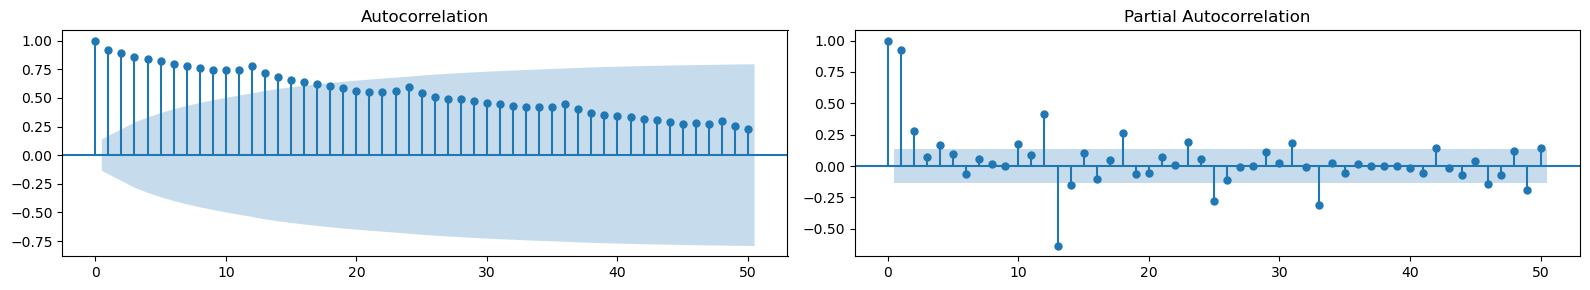

In [7]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/a10.csv')

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Plotting
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])
plt.tight_layout()

In [58]:
"""
Lag plots

It is a scatter plot of time series against a lag itself, used to check autocorrelation. If there is any pattern existing in 
the series, then the series is autocorrelated. If there is no such pattern then series is likely to be random white nosie. 
"""

'\nLag plots\n\nIt is a scatter plot of time series against a lag itself, used to check autocorrelation. If there is any pattern existing in \nthe series, then the series is autocorrelated. If there is no such pattern then series is likely to be random white nosie. \n'

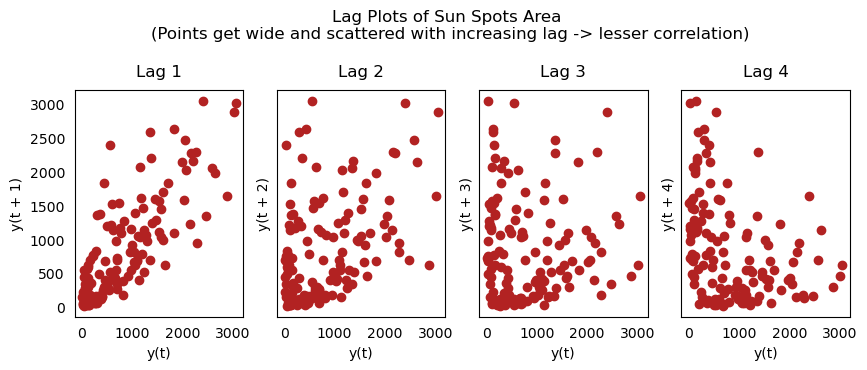

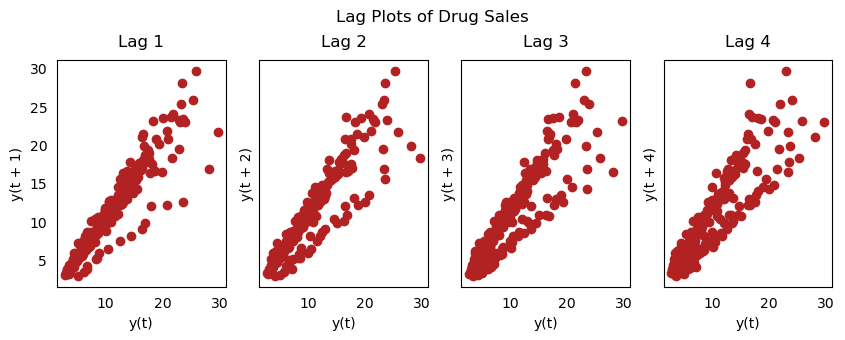

In [61]:
# Importing libraries and dataset
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})
a10 = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/a10.csv')
ss = pd.read_csv('C://Users/yare01/Documents/SMS/KAPH/sunspotarea.csv')

# Plotting

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()
